In [1]:
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav 
import speech_recognition as sr
import sounddevice as sd 
import soundfile as sf

import math 
import cv2
import time
import os
import re


### 1. We know that speech signal is one dimensional vector. Different vector transformations can be applied on the speech signal to enhance its quality. Explore the following vector transformations on the speech signal.

1. Record your voice signal for 30 seconds (speak slow and record) and play it in python.

In [2]:
# Record audio for a short duration
duration = 30  # seconds
fs = 44100  # Sample rate

print("Recording...")
my_recording = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='float64')
sd.wait()
print("Recording finished.")

# Save recording to a WAV file using soundfile
wav_file_path = 'my_voice.wav'
sf.write(wav_file_path, my_recording, fs)

# Ensure the file is saved correctly
if os.path.exists(wav_file_path):
    print(f"File {wav_file_path} successfully saved.")
else:
    print(f"Error: File {wav_file_path} not found.")
    exit()  # Stop execution if file not found

# Transcribe the recording using SpeechRecognition
recognizer = sr.Recognizer()
try:
    with sr.AudioFile(wav_file_path) as source:
        audio_data = recognizer.record(source)
        transcript = recognizer.recognize_google(audio_data)
        print("Transcript:", transcript)
except FileNotFoundError:
    print(f"Error: The file {wav_file_path} was not found for transcription.")
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand the audio.")
except sr.RequestError as e:
    print(f"Could not request results from Google Speech Recognition service; {e}")


# Assuming 'transcript' holds the text from speech recognition
words = transcript.split()  # Split transcript into words
word_count = len(words)  # Count words
print(f"Total words spoken: {word_count}")

# Regular expression to split the transcript into sentences
sentences = re.split(r'[.!?]', transcript)
sentences = [s.strip() for s in sentences if s.strip()]  # Remove empty entries
sentence_count = len(sentences)  # Count sentences
print(f"Total sentences spoken: {sentence_count}")

Recording...
Recording finished.
File my_voice.wav successfully saved.
Transcript: hello this is Shweta 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
Total words spoken: 34
Total sentences spoken: 1


2. Print the shape of the signal. Is it a 1D vector ?

In [3]:
# Check the shape of the recording
signal_shape = my_recording.shape
signal_shape


(1323000, 1)

3. Plot the signal. Can u able to roughly tell how many words/sentences spoken?

In [4]:
print(f"Total words spoken: {word_count}")
print(f"Total sentences spoken: {sentence_count}")

Total words spoken: 34
Total sentences spoken: 1


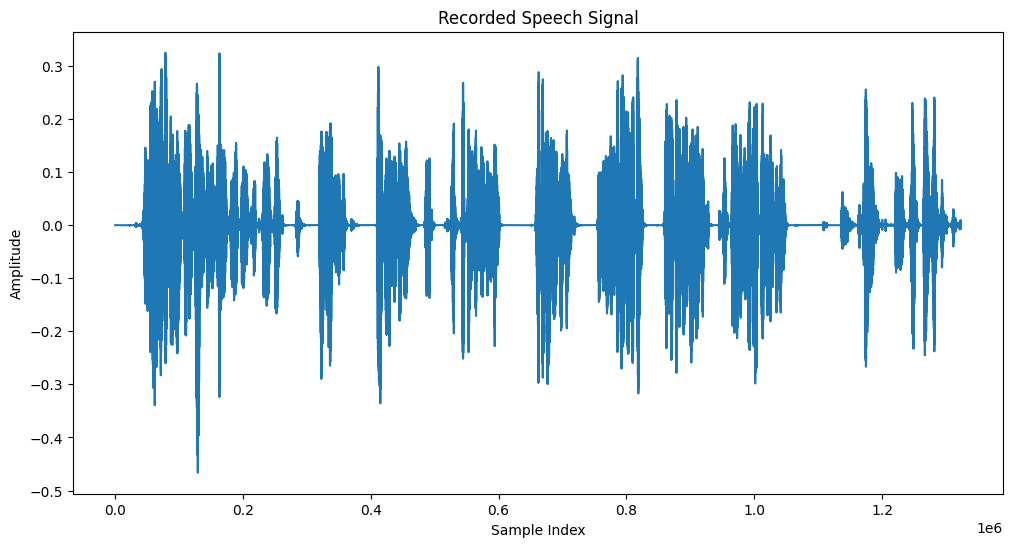

In [5]:
# Plot the signal
plt.figure(figsize=(12, 6))
plt.plot(my_recording)
plt.title('Recorded Speech Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

4. Take only the first 15 seconds of your speech signal

In [6]:
 
first_15_seconds = my_recording[:15 * fs]  # Slice out the first 15 seconds

# Play the first 15 seconds of the recording
print("Playing the first 15 seconds of the recording...")
sd.play(first_15_seconds, fs)
sd.wait()  # Wait until the playback is finished
print("Play completed")


Playing the first 15 seconds of the recording...
Play completed


5. Down sample the speech vector by 2 (Pick one sample for every two sample)

In [7]:
 
downsampled_recording = my_recording[::2]
 
new_fs = fs // 2 
print("Playing the downsampled recording...")
sd.play(downsampled_recording, new_fs)
sd.wait()  # Wait until the playback is finished
print("Play completed")


Playing the downsampled recording...
Play completed


6. Upsample the speech vector by 2 (Introduce one sample newly between every two sample)

In [8]:
upsampled_length = 2 * len(my_recording) - 1
upsampled_recording = np.zeros(upsampled_length)
upsampled_recording[::2] = my_recording[:,0]  # Use only the first channel if stereo
upsampled_recording[1::2] = (my_recording[:-1,0] + my_recording[1:,0]) / 2  # Again, assuming mono or using only one channel
new_fs = fs * 2
print("Playing the upsampled recording...")
sd.play(upsampled_recording, new_fs)
sd.wait()  # Wait until the playback is finished
print("Play completed")


Playing the upsampled recording...
Play completed


7. Apply the following transformations on the speech signal and try to hear to

a. 3*Speech signal

b. 0.5*Speech signal

c. exp(0.5*speech signal)

d. ln(speech signal)

e. Cos (Speech Signal)

f. Speech signal + normal_random_noise of same length of speech signal

In [9]:
# Apply the transformations
transformed_signal_3x = 3 * my_recording
transformed_signal_05x = 0.5 * my_recording
transformed_signal_exp = np.exp(0.5 * my_recording)
transformed_signal_ln = np.log(np.clip(my_recording, a_min=1e-10, a_max=None))
transformed_signal_cos = np.cos(my_recording)
noise = np.random.normal(0, 0.01, my_recording.shape)
transformed_signal_noise = my_recording + noise

# Plot the signals
signals = [
    ("Original", my_recording),
    ("3x Signal", transformed_signal_3x),
    ("0.5x Signal", transformed_signal_05x),
    ("exp(0.5x Signal)", transformed_signal_exp),
    ("ln(Signal)", transformed_signal_ln),
    ("Cos(Signal)", transformed_signal_cos),
    ("Signal + Noise", transformed_signal_noise)
]

In [10]:
 
from scipy.io.wavfile import write 

# Save and play the original and transformed signals
for name, signal in signals:
    # Save to file
    file_path = f'{name.replace(" ", "_").replace("(", "").replace(")", "")}.wav'
    write(file_path, fs, signal.astype(np.float32))
    # Play the signal
    print(f"Playing {name}...")
    sd.play(signal, fs)
    sd.wait()  # Wait until playback is finished
    print(f"Play completed for {name}")

Playing Original...
Play completed for Original
Playing 3x Signal...
Play completed for 3x Signal
Playing 0.5x Signal...
Play completed for 0.5x Signal
Playing exp(0.5x Signal)...
Play completed for exp(0.5x Signal)
Playing ln(Signal)...
Play completed for ln(Signal)
Playing Cos(Signal)...
Play completed for Cos(Signal)
Playing Signal + Noise...
Play completed for Signal + Noise


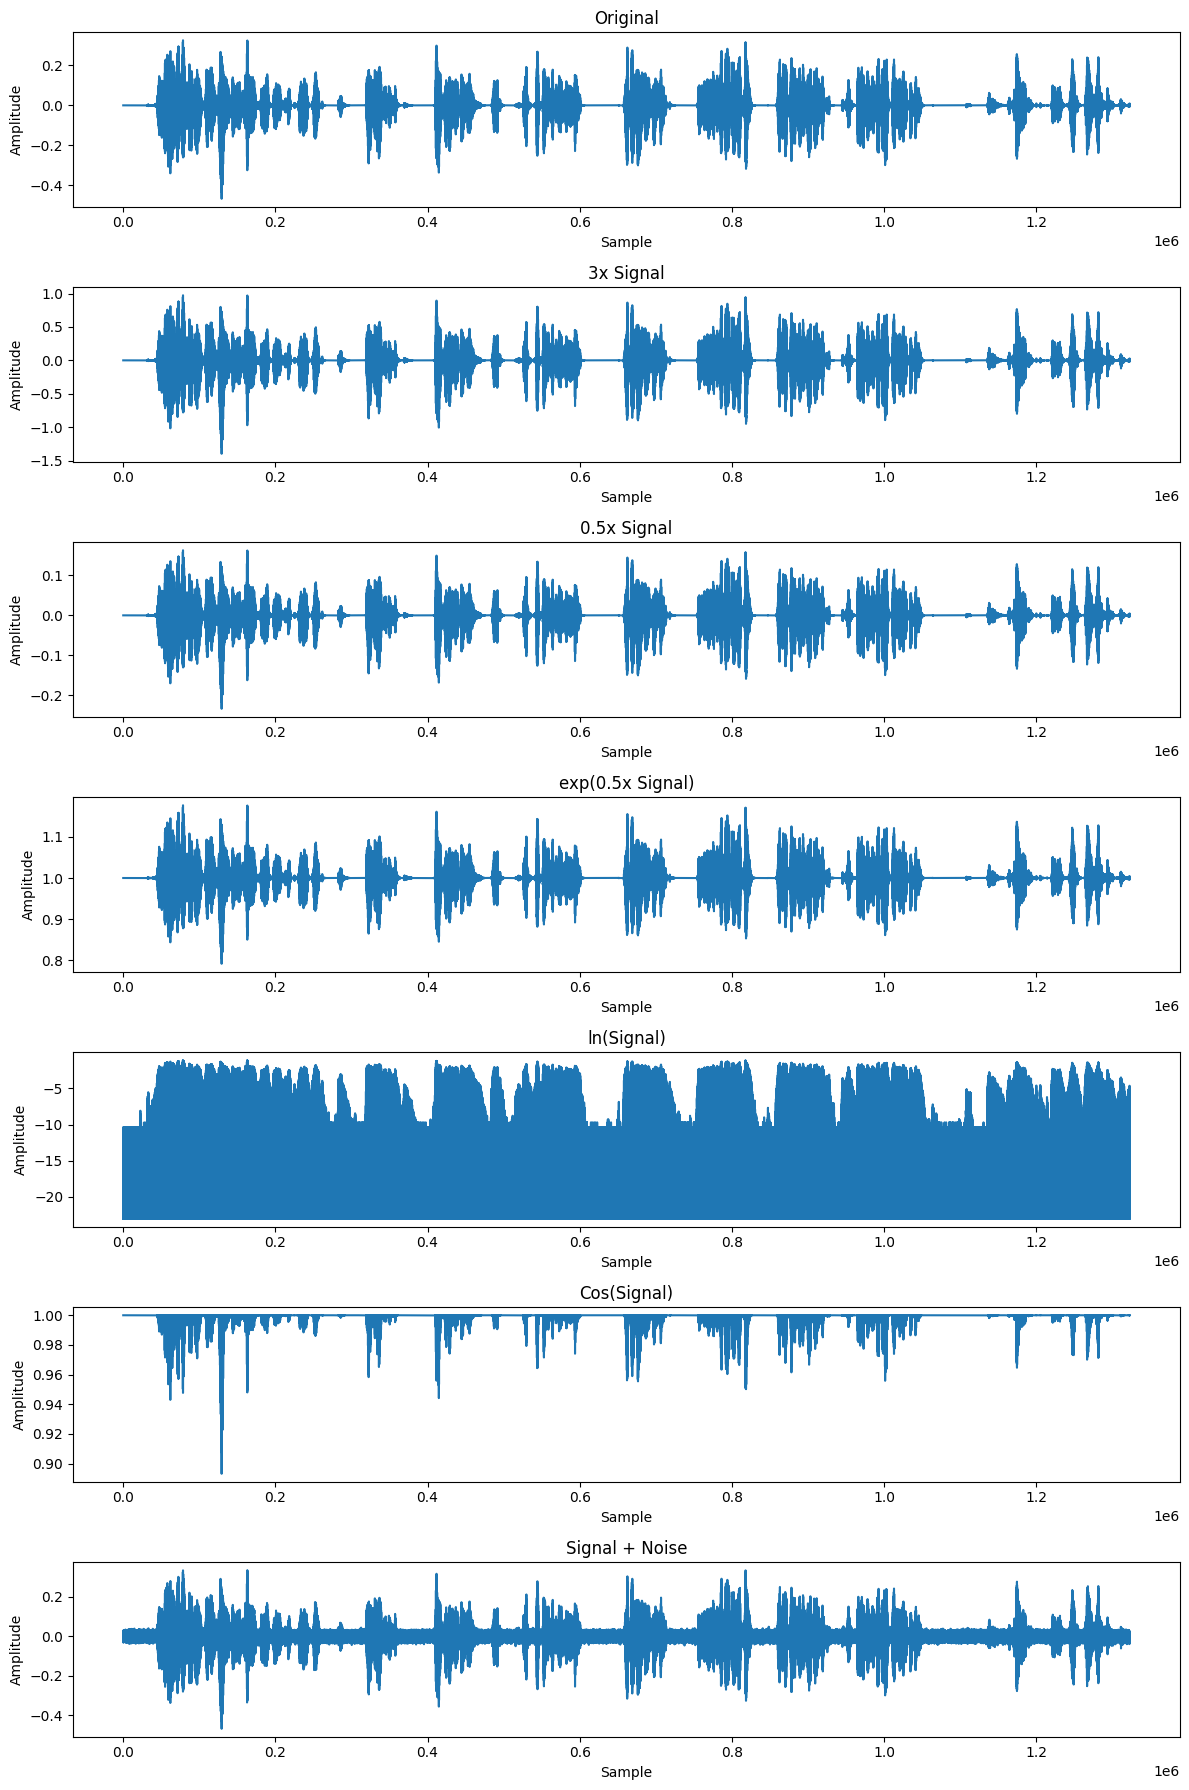

In [11]:
plt.figure(figsize=(12, 18))
for i, (title, signal) in enumerate(signals, 1):
    plt.subplot(7, 1, i)
    plt.plot(signal)
    plt.title(title)
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


### 2. We know that image is a 2D data, which is nothing but a matrix. Apply different matrix transformations on the following image.

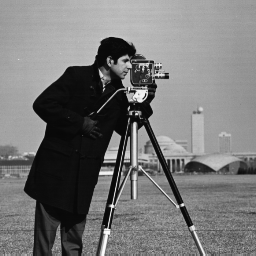

In [12]:
image_path = 'cameraman.png'
img = Image.open(image_path)
# Check if the image was successfully loaded using CV2
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("The image could not be loaded. Please check the image path.")
img

1.	Is the cameraman coat have any packets in it ? Apply different transformations on this image to visually prove the answer for this question.

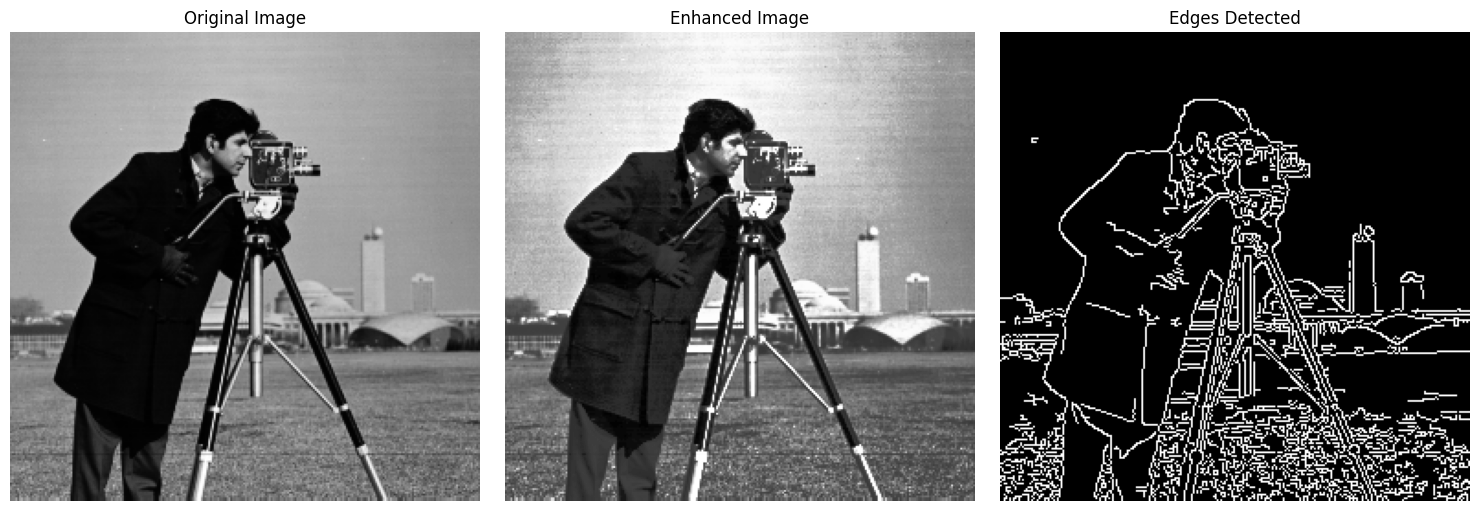

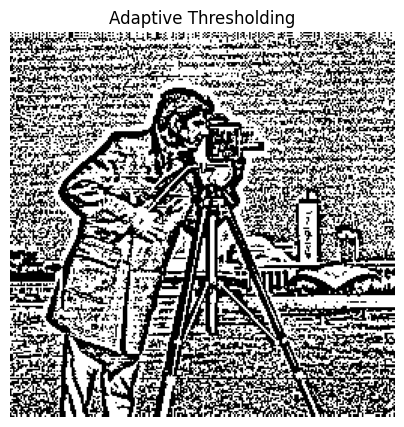

Findings:
1. The original image provides a standard view of the cameraman's coat.
2. The enhanced image, which has improved contrast, shows more details of the coat.
3. The edges detected image highlights the outlines and prominent features of the coat.
4. The adaptive thresholding image further enhances the visibility of details by creating a high-contrast binary image.
From these transformations, especially the edge-detected and adaptive threshold images, it is possible to observe the outline of pockets on the cameraman's coat.
Conclusion: The transformations visually support the conclusion that there are indeed pockets on the coat.


In [13]:
# open the image and find the edges from the image that will help in finding the answer

# Enhance the contrast
enhanced_image = cv2.equalizeHist(image)

# Detect edges
edges = cv2.Canny(enhanced_image, 100, 200)

# Apply another method: adaptive thresholding to highlight details
adaptive_thresh = cv2.adaptiveThreshold(enhanced_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Plotting the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(enhanced_image, cmap='gray')
axes[1].set_title('Enhanced Image')

axes[2].imshow(edges, cmap='gray')
axes[2].set_title('Edges Detected')

for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()

# Plotting adaptive thresholding separately
plt.figure(figsize=(5, 5))
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')
plt.show()

# Findings
print("Findings:")
print("1. The original image provides a standard view of the cameraman's coat.")
print("2. The enhanced image, which has improved contrast, shows more details of the coat.")
print("3. The edges detected image highlights the outlines and prominent features of the coat.")
print("4. The adaptive thresholding image further enhances the visibility of details by creating a high-contrast binary image.")
print("From these transformations, especially the edge-detected and adaptive threshold images, it is possible to observe the outline of pockets on the cameraman's coat.")
print("Conclusion: The transformations visually support the conclusion that there are indeed pockets on the coat.")


2.	Create the negative version of this image

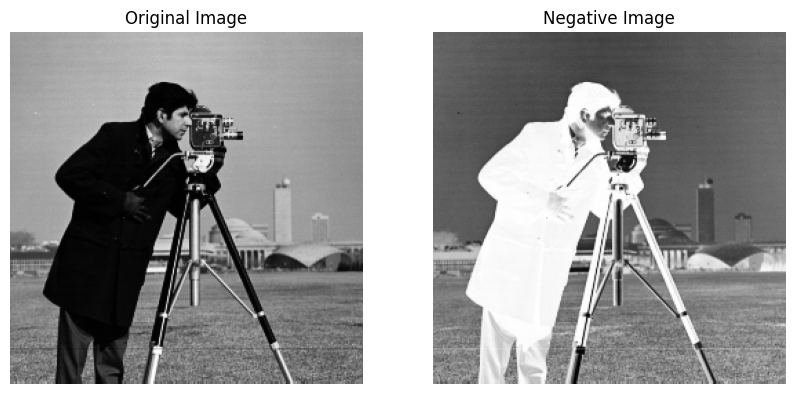

In [14]:
#hint: 255-image graylevel values 

# Calculate the negative by subtracting from 255
negative_image = 255 - image

# Convert the negative image back to a PIL image for consistent display
negative_img_pil = Image.fromarray(negative_image)

# Display both original and negative images using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_img_pil, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.show()

3.	Rotate the image by an angles 45deg, 90 deg.

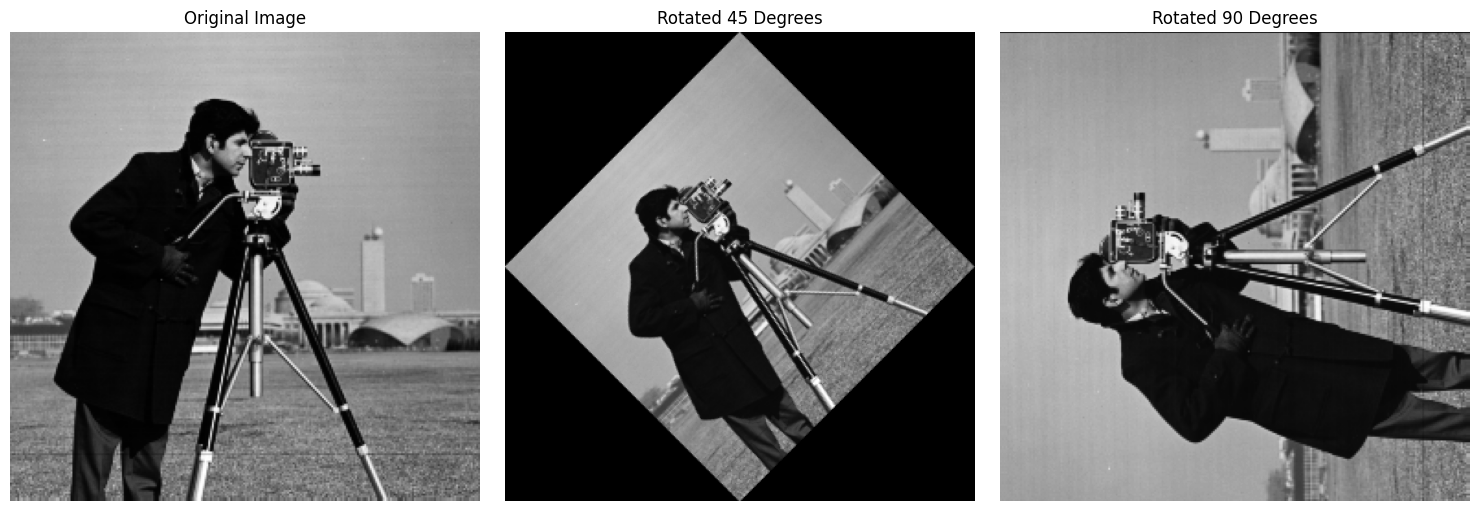

Findings:
1. The original image provides a standard view of the scene.
2. The image rotated by 45 degrees gives a diagonal orientation of the scene.
3. The image rotated by 90 degrees gives a vertical orientation of the scene.
The rotations are performed using image transformation matrices and vector dot products.


In [15]:
# use image transformation
# Function to rotate an image using a rotation matrix
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    
    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    # Calculate the sine and cosine of the rotation angle
    cos = np.abs(rotation_matrix[0, 0])
    sin = np.abs(rotation_matrix[0, 1])
    
    # Compute the new bounding dimensions of the image
    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))
    
    # Adjust the rotation matrix to account for translation
    rotation_matrix[0, 2] += (new_w / 2) - center[0]
    rotation_matrix[1, 2] += (new_h / 2) - center[1]
    
    # Perform the actual rotation and return the image
    return cv2.warpAffine(image, rotation_matrix, (new_w, new_h))

# Rotate the image by 45 degrees
rotated_45 = rotate_image(image, 45)

# Rotate the image by 90 degrees
rotated_90 = rotate_image(image, 90)

# Plotting the original and rotated images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(rotated_45, cmap='gray')
axes[1].set_title('Rotated 45 Degrees')
axes[1].axis('off')

axes[2].imshow(rotated_90, cmap='gray')
axes[2].set_title('Rotated 90 Degrees')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Findings
print("Findings:")
print("1. The original image provides a standard view of the scene.")
print("2. The image rotated by 45 degrees gives a diagonal orientation of the scene.")
print("3. The image rotated by 90 degrees gives a vertical orientation of the scene.")
print("The rotations are performed using image transformation matrices and vector dot products.")

4.	Horizontally flip the image

Defined the transformation matrix for horizontal flipping. For a 2D image, this can be represented by a matrix that negates the x-coordinates while keeping the y-coordinates unchanged. Then applied the transformation matrix to each coordinate of the image.Used the dot product to apply the transformation to the image pixels.

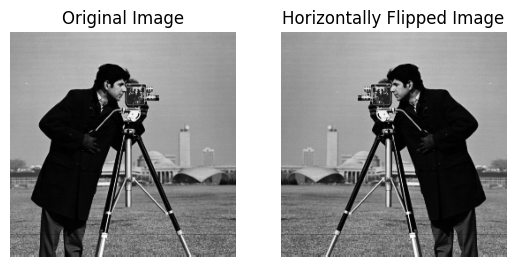

In [16]:

# Define the horizontal flip transformation matrix
# This matrix flips the x-coordinate
transformation_matrix = np.array([[-1,  0,  0],
                                  [ 0,  1,  0],
                                  [ 0,  0,  1]])

# Apply the transformation matrix using a dot product
# Compute the new coordinates for each pixel
height, width = image.shape
new_image = np.zeros_like(image)
for y in range(height):
    for x in range(width):
        new_x, new_y, _ = np.dot(transformation_matrix, np.array([x, y, 1]))
        new_x += width - 1  # Adjust the x-coordinate since it's negated
        if 0 <= new_x < width:
            new_image[y, int(new_x)] = image[y, x]

# Display the original and flipped image using matplotlib
#plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap='gray')
plt.title('Horizontally Flipped Image')
plt.axis('off')

plt.show()


5.	Zoom out the image using any matrix interpolation (up-sampling)

Original image shape: (256, 256)
Upscaled image shape: (512, 512)


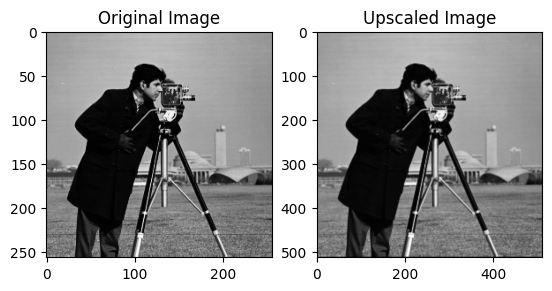

In [17]:
# Define the scaling factor
scale_factor = 2  # Increase the size by a factor of 2

# Define the transformation matrix for scaling
# The matrix needs to be 2x3 and of type float32
transformation_matrix = np.float32([[scale_factor, 0, 0],
                                    [0, scale_factor, 0]])

# Apply the transformation using matrix interpolation
# Adjust transformation matrix shape to 2x3 by adding a translation component
rows, cols = image.shape
upscaled_image = cv2.warpAffine(image, transformation_matrix, (cols * scale_factor, rows * scale_factor), flags=cv2.INTER_LINEAR)

# Print the shapes of the original and upscaled images
print("Original image shape:", image.shape)
print("Upscaled image shape:", upscaled_image.shape)



# Display the original and transformed images using matplotlib
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Upscaled Image')
plt.imshow(upscaled_image, cmap='gray')
plt.show()
